# Wczytanie danych


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

%load_ext tensorboard

In [2]:
mnist_dataset, mnist_info = tfds.load(name= "mnist", with_info=True, as_supervised = True)

In [3]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


In [4]:
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

In [5]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label
scale_train_and_validation_data = mnist_train.map(scale)
scale_test_data =  mnist_test.map(scale)

In [6]:
BATCH_SIZE = 128
BUFFER_SIZE = 10000
output_size = 10
NUM_EPOCHS = 50

In [7]:
shuffled_train_and_validation_data = scale_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = scale_test_data.batch(num_test_samples)

In [8]:
validation_inputs, validation_targets = next(iter(validation_data))


# Model z pięcioma gęstymi warstwami 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(150, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(75, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='sigmoid'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_5_layers")

In [11]:
hist_5_layers = model.fit(train_data, epochs= NUM_EPOCHS, validation_data = (validation_inputs, validation_targets), callbacks = [tensorboard_callback], verbose = 2)

Epoch 1/50
422/422 - 4s - loss: 1.3463 - accuracy: 0.4537 - val_loss: 0.6343 - val_accuracy: 0.7403
Epoch 2/50
422/422 - 2s - loss: 0.5497 - accuracy: 0.8007 - val_loss: 0.3180 - val_accuracy: 0.9303
Epoch 3/50
422/422 - 2s - loss: 0.3271 - accuracy: 0.9203 - val_loss: 0.2030 - val_accuracy: 0.9515
Epoch 4/50
422/422 - 2s - loss: 0.2643 - accuracy: 0.9351 - val_loss: 0.1871 - val_accuracy: 0.9545
Epoch 5/50
422/422 - 2s - loss: 0.2267 - accuracy: 0.9434 - val_loss: 0.1542 - val_accuracy: 0.9615
Epoch 6/50
422/422 - 2s - loss: 0.1987 - accuracy: 0.9494 - val_loss: 0.1306 - val_accuracy: 0.9695
Epoch 7/50
422/422 - 2s - loss: 0.1856 - accuracy: 0.9541 - val_loss: 0.1208 - val_accuracy: 0.9693
Epoch 8/50
422/422 - 2s - loss: 0.1751 - accuracy: 0.9562 - val_loss: 0.1168 - val_accuracy: 0.9690
Epoch 9/50
422/422 - 2s - loss: 0.1624 - accuracy: 0.9591 - val_loss: 0.1037 - val_accuracy: 0.9752
Epoch 10/50
422/422 - 2s - loss: 0.1586 - accuracy: 0.9599 - val_loss: 0.1056 - val_accuracy: 0.9728

In [12]:
test_loss_5_layers, test_accuracy_5_layers = model.evaluate(test_data)

1/1 [==============================] - 0s 356ms/step - loss: 0.1091 - accuracy: 0.9784


In [13]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss_5_layers, test_accuracy_5_layers*100.))

Test loss: 0.11. Test accuracy: 97.84%


# Model z jedna gęstą warstwą

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(10, activation='sigmoid'), 
    tf.keras.layers.Dense(output_size, activation='softmax') 
])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_1_layer")
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist_1_layer = model.fit(train_data, epochs= NUM_EPOCHS, validation_data = (validation_inputs, validation_targets), callbacks = [tensorboard_callback], verbose = 2)

Epoch 1/50
422/422 - 2s - loss: 0.6145 - accuracy: 0.8514 - val_loss: 0.3392 - val_accuracy: 0.9050
Epoch 2/50
422/422 - 1s - loss: 0.3103 - accuracy: 0.9111 - val_loss: 0.2928 - val_accuracy: 0.9143
Epoch 3/50
422/422 - 1s - loss: 0.2773 - accuracy: 0.9193 - val_loss: 0.2864 - val_accuracy: 0.9148
Epoch 4/50
422/422 - 1s - loss: 0.2651 - accuracy: 0.9223 - val_loss: 0.2677 - val_accuracy: 0.9182
Epoch 5/50
422/422 - 1s - loss: 0.2493 - accuracy: 0.9261 - val_loss: 0.2710 - val_accuracy: 0.9192
Epoch 6/50
422/422 - 1s - loss: 0.2428 - accuracy: 0.9285 - val_loss: 0.2538 - val_accuracy: 0.9252
Epoch 7/50
422/422 - 1s - loss: 0.2359 - accuracy: 0.9306 - val_loss: 0.2667 - val_accuracy: 0.9190
Epoch 8/50
422/422 - 1s - loss: 0.2310 - accuracy: 0.9319 - val_loss: 0.2552 - val_accuracy: 0.9208
Epoch 9/50
422/422 - 1s - loss: 0.2223 - accuracy: 0.9341 - val_loss: 0.2488 - val_accuracy: 0.9232
Epoch 10/50
422/422 - 1s - loss: 0.2206 - accuracy: 0.9352 - val_loss: 0.2334 - val_accuracy: 0.9292

In [15]:
test_loss_1_layer, test_accuracy_1_layer = model.evaluate(test_data)

1/1 [==============================] - 0s 293ms/step - loss: 0.2773 - accuracy: 0.9261


In [16]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss_1_layer, test_accuracy_1_layer*100.))

Test loss: 0.28. Test accuracy: 92.61%


# Model z 5 warstwami w tym konwolucyjnymi

In [17]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/model_5_layers_cnn")
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
hist_5_layers_cnn = model.fit(train_data, epochs= NUM_EPOCHS, validation_data = (validation_inputs, validation_targets), callbacks = [tensorboard_callback], verbose = 2)

Epoch 1/50
422/422 - 11s - loss: 1.3141 - accuracy: 0.5297 - val_loss: 0.2934 - val_accuracy: 0.9120
Epoch 2/50
422/422 - 10s - loss: 0.2743 - accuracy: 0.9167 - val_loss: 0.2174 - val_accuracy: 0.9362
Epoch 3/50
422/422 - 10s - loss: 0.2005 - accuracy: 0.9396 - val_loss: 0.1611 - val_accuracy: 0.9512
Epoch 4/50
422/422 - 10s - loss: 0.1696 - accuracy: 0.9499 - val_loss: 0.1506 - val_accuracy: 0.9567
Epoch 5/50
422/422 - 10s - loss: 0.1453 - accuracy: 0.9563 - val_loss: 0.1291 - val_accuracy: 0.9605
Epoch 6/50
422/422 - 10s - loss: 0.1340 - accuracy: 0.9601 - val_loss: 0.1390 - val_accuracy: 0.9605
Epoch 7/50
422/422 - 10s - loss: 0.1311 - accuracy: 0.9604 - val_loss: 0.1353 - val_accuracy: 0.9613
Epoch 8/50
422/422 - 10s - loss: 0.1212 - accuracy: 0.9640 - val_loss: 0.1017 - val_accuracy: 0.9712
Epoch 9/50
422/422 - 10s - loss: 0.1155 - accuracy: 0.9652 - val_loss: 0.1072 - val_accuracy: 0.9682
Epoch 10/50
422/422 - 10s - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.1199 - val_accura

In [18]:
test_loss_5_cnn, test_accuracy_5_cnn = model.evaluate(test_data)

1/1 [==============================] - 1s 510ms/step - loss: 0.0851 - accuracy: 0.9768


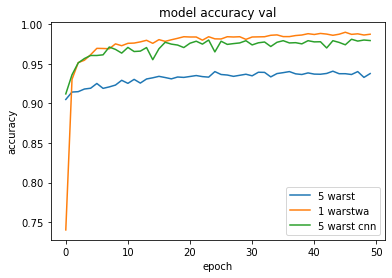

In [19]:
plt.plot(hist_1_layer.history['val_accuracy'])
plt.plot(hist_5_layers.history['val_accuracy'])
plt.plot(hist_5_layers_cnn.history['val_accuracy'])
plt.title('model accuracy val')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['5 warst', '1 warstwa','5 warst cnn'], loc='lower right')

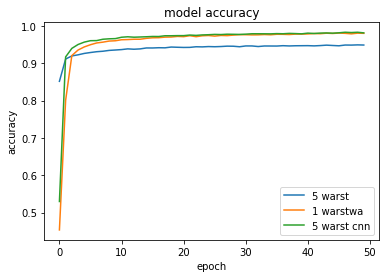

In [20]:
plt.plot(hist_1_layer.history['accuracy'])
plt.plot(hist_5_layers.history['accuracy'])
plt.plot(hist_5_layers_cnn.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['5 warst', '1 warstwa','5 warst cnn'], loc='lower right')

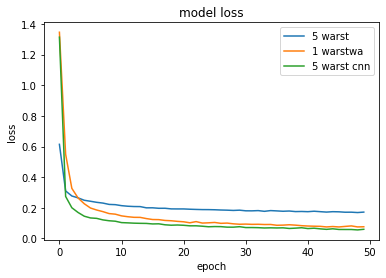

In [25]:
plt.plot(hist_1_layer.history['loss'])
plt.plot(hist_5_layers.history['loss'])
plt.plot(hist_5_layers_cnn.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['5 warst', '1 warstwa','5 warst cnn'], loc='upper right')

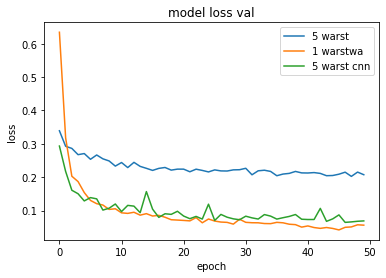

In [26]:
plt.plot(hist_1_layer.history['val_loss'])
plt.plot(hist_5_layers.history['val_loss'])
plt.plot(hist_5_layers_cnn.history['val_loss'])
plt.title('model loss val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['5 warst', '1 warstwa','5 warst cnn'], loc='upper right')

In [23]:
%tensorboard --logdir logs/


Reusing TensorBoard on port 6006 (pid 12188), started 0:14:03 ago. (Use '!kill 12188' to kill it.)